In [24]:
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
all = pd.concat([train, test], sort=False)
all.columns


Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

In [59]:
all['date'] = pd.to_datetime(all['date'])
all['year'] = all['date'].dt.year
all['month'] = all['date'].dt.month
all['day_of_month'] = all['date'].dt.day
all['dayofweek'] = all['date'].dt.dayofweek
all['is_month_start'] = all['date'].dt.is_month_start
all['is_month_end'] = all['date'].dt.is_month_end
all['quarter'] = all['date'].dt.quarter
all['weekend'] = (all['date'].dt.weekday >= 5).astype(int)
# add the week of the year
all['week_of_year'] = all['date'].apply(lambda x: x.isocalendar().week)
all['day_of_year'] = all['date'].dt.dayofyear


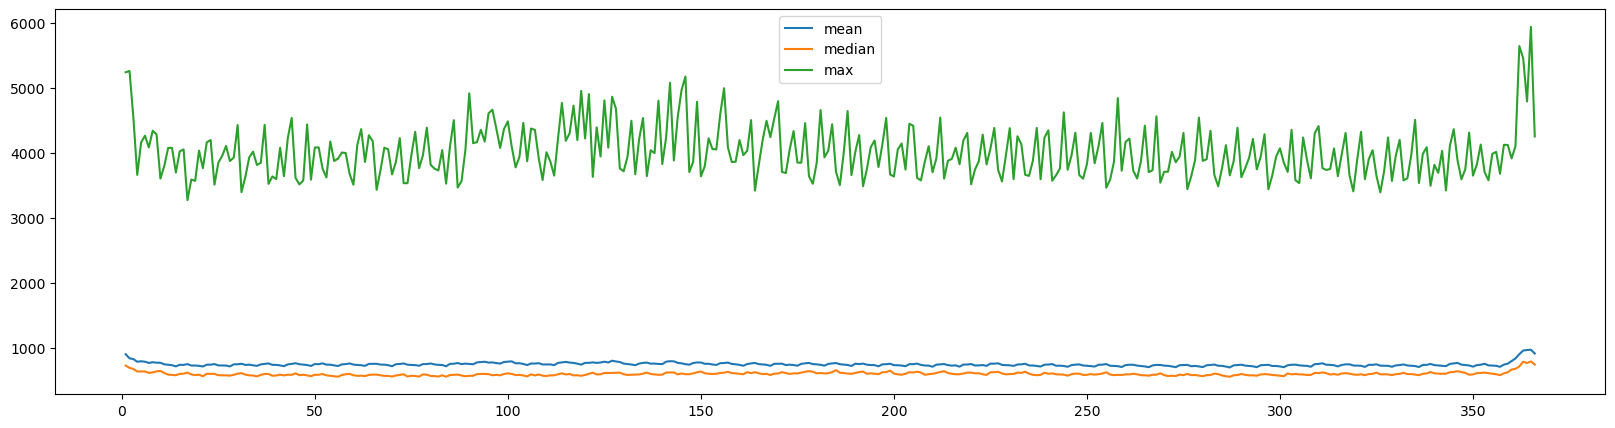

In [81]:
means = all.groupby('day_of_year')['num_sold'].mean()
medians = all.groupby('day_of_year')['num_sold'].median()
max = all.groupby('day_of_year')['num_sold'].max()
# plot the measures in the same graph
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.plot(means, label='mean')
plt.plot(medians, label='median')
plt.plot(max, label='max')
plt.legend()
plt.show()